In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

sns.set(style="whitegrid")

In [3]:
# Define helpers
def bootstrap_sample(data, f, n=100):
    result = []
    for _ in range(n):
        sample = np.random.choice(data, len(data), replace=True)
        r = f(sample)
        result.append(r)
    return np.array(result)

def helper_describe_numerical_variable(data, key):
    # Describe the variable
    print('min = {stat:.2f}'.format(stat=np.min(data[key])))
    print('Q1 = {stat:.2f}'.format(stat=stats.mstats.mquantiles(data[key], [0.25])[0]))
    print('mean = {stat:.2f}'.format(stat=np.mean(data[key])))
    print('median (Q2) = {stat:.2f}'.format(stat=np.median(data[key])))
    print( 'Q3 = {stat:.2f}'.format(stat=stats.mstats.mquantiles(data[key], [0.75])[0]))
    print('max = {stat:.2f}'.format(stat=np.max(data[key])))
    print('range = {stat:.2f}'.format(stat=np.max(data[key]) - np.min(data[key])))
    print('IQR = {stat:.2f}'.format(stat=stats.mstats.mquantiles(data[key], [0.75])[0] - stats.mstats.mquantiles(data[key], [0.25])[0]))
    print('variance (std) = {var:.2f} ({std:.2f})'.format(var=np.var(data[key]), std=np.std(data[key])))
    print('COV = {stat:.2f}%'.format(stat=(np.std(data[key])/np.mean(data[key]))*100))
    # Plot the histogram
    figure, axes = plt.subplots()
    axes.hist(data[key], density=True)
    axes.axvline(np.mean(data[key]), color='DarkRed')
    axes.axvline(np.median(data[key]), color='DarkOrange')
    axes.set_xlabel(key)
    axes.set_title('{} Distribution'.format(key))
    plt.show()
    plt.close()

    
def correlation(data, key1, key2):
    print('Correlation coefficients between {} and {}:'.format(key1, key2))
    print('r = {}'.format(stats.pearsonr(data[key1], data[key2])[0]))
    print('rho =', stats.spearmanr(data[key1], data[key2])[0])
    
def helper_effect_of_numerical_variable(data, key1, key2):
    correlation(data, key1, key2)
    figure = plt.figure(figsize=(10, 6))
    axes = figure.add_subplot(1, 1, 1)
    axes.scatter(data[key1], data[key2])
    axes.set_xlabel(key1)
    axes.set_ylabel(key2)
    axes.set_title('Effect of {} on {}'.format(key1, key2))
    axes.set_ylim(stats.mstats.mquantiles(data[key2], [0.001, 0.999]))
    plt.show()
    plt.close()


## EDA on House Price DataSet

### DataSet:  https://www.kaggle.com/shree1992/housedata/version/2#

### EDA Variables: 
1. bathrooms: categorical
2. view: categorical
3. yr_renovated: float
4. sqft_living: float
5. location: statezip, categorical

In [4]:
# Load Data
data = pd.read_csv('data.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### EDA on bathrooms

min = 0.00
Q1 = 1.75
mean = 2.16
median (Q2) = 2.25
Q3 = 2.50
max = 8.00
range = 8.00
IQR = 0.75
variance (std) = 0.61 (0.78)
COV = 36.27%


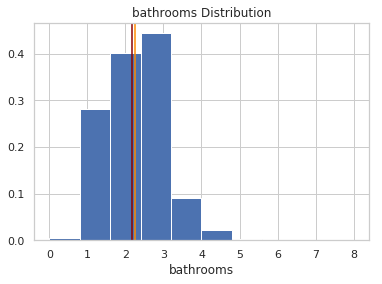

In [5]:
helper_describe_numerical_variable(data, 'bathrooms')

The bathroom numbers show a skewed normal distribution

### Effect of Bathrooms on Price

Correlation coefficients between bathrooms and price:
r = 0.3271099182877348
rho = 0.49245128595002247


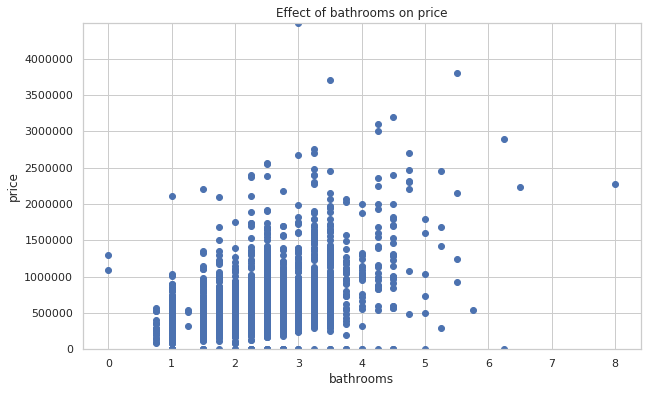

In [6]:
helper_effect_of_numerical_variable(data, 'bathrooms', 'price')

There are no obvious correlation between bathrooms and price. We will check the box plot to see the general trend

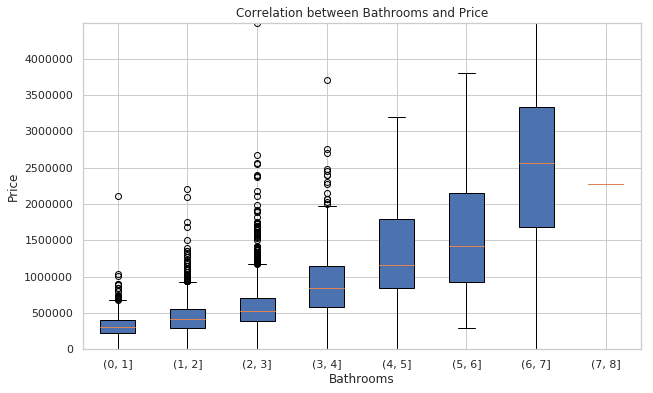

In [7]:
bins = range(9)
groups = data.groupby(pd.cut(data.bathrooms, bins))
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
axes.boxplot(
    [group.price for name, group in groups],
    labels=[name for name, group in groups],
    patch_artist=True,
    zorder=1)
axes.set_xlabel('Bathrooms')
axes.set_ylabel('Price')
axes.set_ylim(stats.mstats.mquantiles(data.price, [0.001, 0.999]))
axes.set_title('Correlation between Bathrooms and Price')
plt.show()
plt.close()

The general trend is that the median house price increases with increasing number of bathrooms.

### EDA on views

In [8]:
data.view = data.view.astype('category')
pd.DataFrame(data.view.value_counts(normalize=True).sort_index())

,view
0,0.900000
1,0.015000
2,0.044565
3,0.025217
4,0.015217


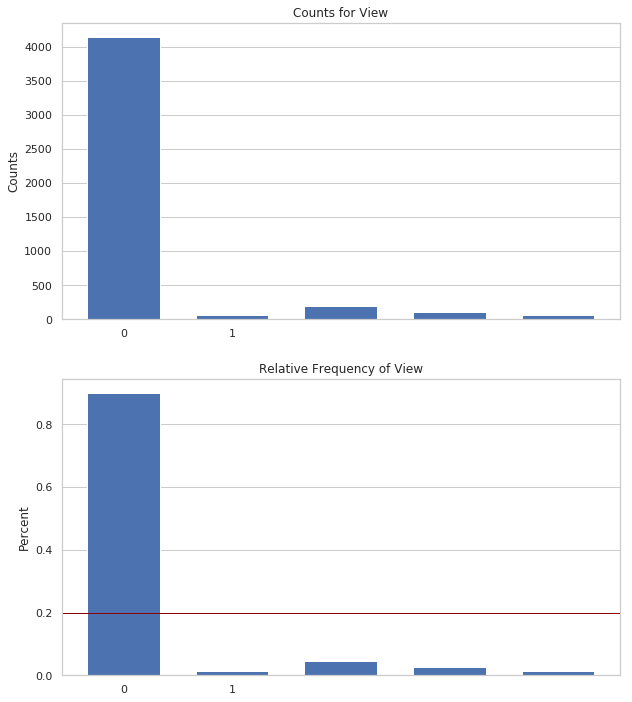

In [9]:
# Plot the histogram
counts = data.view.value_counts().sort_index()
proportions = data.view.value_counts(normalize=True).sort_index()
x = range(len(counts))
width = 1/1.5
figure = plt.figure(figsize=(10, 12))
axes = figure.add_subplot(2, 1, 1)
axes.bar(x, counts, width, align='center')
axes.set_xticks([0, 1])
axes.set_xticklabels(counts.axes[0])
axes.set_title('Counts for View')
axes.set_ylabel('Counts')
axes.xaxis.grid(False)
axes = figure.add_subplot(2, 1, 2)
axes.bar(x, proportions, width, align="center")
axes.axhline(1/len(counts), 0, 4, lw=1, color="DarkRed")
axes.set_xticks([0, 1])
axes.set_xticklabels(proportions.axes[0])
axes.set_title('Relative Frequency of View')
axes.set_ylabel('Percent')
axes.xaxis.grid(False)

### Effect of View on price

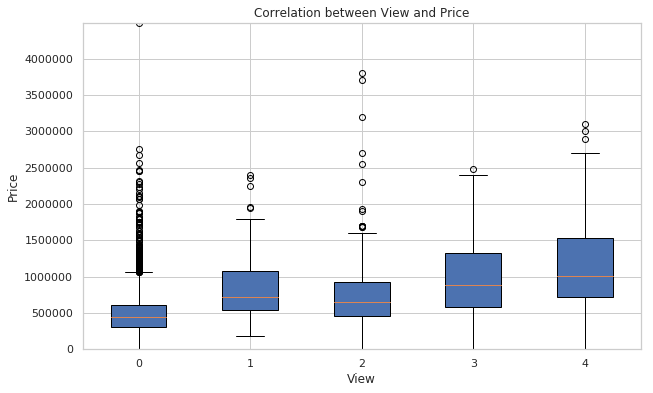

In [10]:
groups = data.groupby('view')
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
axes.boxplot(
    [group.price for name, group in groups],
    labels=[name for name, group in groups],
    patch_artist=True,
    zorder=1)
axes.set_xlabel('View')
axes.set_ylabel('Price')
axes.set_title('Correlation between View and Price')
axes.set_ylim(stats.mstats.mquantiles(data.price, [0.001, 0.999]))
plt.show()
plt.close()

In general view=0 has the lowest price, the order for views in term of price is view2 < view1 < view3 < view4

### EDA on yr_renovated

min = 0.00
Q1 = 0.00
mean = 808.61
median (Q2) = 0.00
Q3 = 1999.00
max = 2014.00
range = 2014.00
IQR = 1999.00
variance (std) = 959044.30 (979.31)
COV = 121.11%


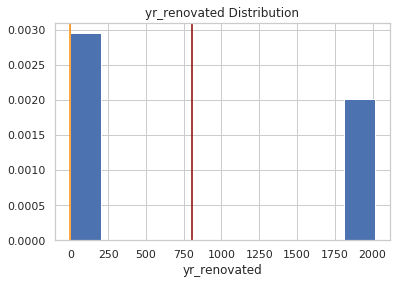

In [11]:
helper_describe_numerical_variable(data, 'yr_renovated')

The distribution is not clear as there are many 0s in the data (indicating the house hasn't been renovated)

min = 1912.00
Q1 = 1990.00
mean = 1994.42
median (Q2) = 2001.00
Q3 = 2006.00
max = 2014.00
range = 102.00
IQR = 16.00
variance (std) = 456.53 (21.37)
COV = 1.07%


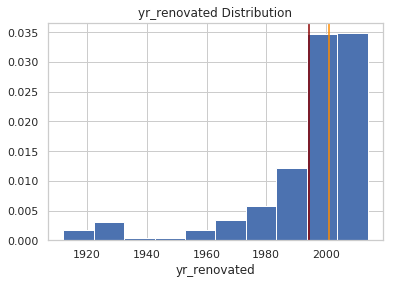

In [12]:
helper_describe_numerical_variable(data[data.yr_renovated>0], 'yr_renovated')

The subset shows a skewed normal distribution.

### Effect of yr-renovated on price

Correlation coefficients between yr_renovated and price:
r = -0.02410435959834043
rho = -0.040299092594765516


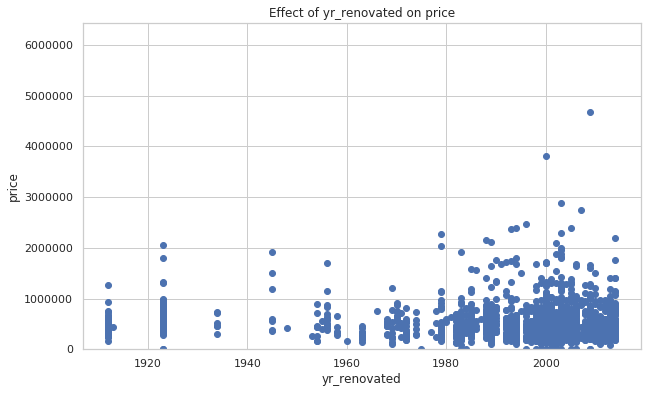

In [13]:
helper_effect_of_numerical_variable(data[data.yr_renovated>0], 'yr_renovated', 'price')

There are no obvious correlation between year renovated and price. We will check the box plot to see the general trend

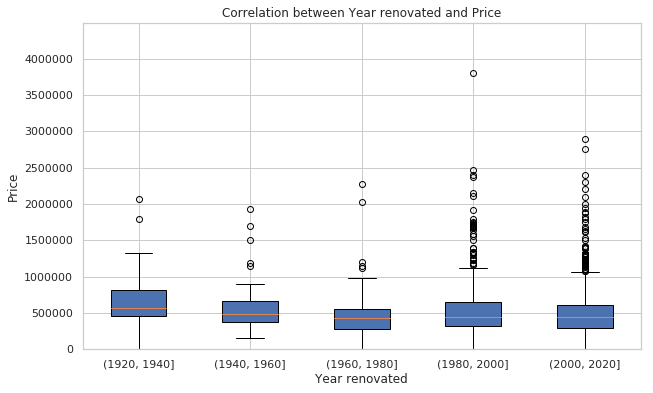

In [14]:
bins = [1920, 1940, 1960, 1980, 2000, 2020]
groups = data[data.yr_renovated>0].groupby(pd.cut(data[data.yr_renovated>0].yr_renovated, bins))
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
axes.boxplot(
    [group.price for name, group in groups],
    labels=[name for name, group in groups],
    patch_artist=True,
    zorder=1)
axes.set_xlabel('Year renovated')
axes.set_ylabel('Price')
axes.set_ylim(stats.mstats.mquantiles(data.price, [0.001, 0.999]))
axes.set_title('Correlation between Year renovated and Price')
plt.show()
plt.close()

The general trend is that the median house price is lower for houses renovated more recently.

### EDA on sqft_living

min = 370.00
Q1 = 1460.00
mean = 2139.35
median (Q2) = 1980.00
Q3 = 2620.00
max = 13540.00
range = 13170.00
IQR = 1160.00
variance (std) = 927565.87 (963.10)
COV = 45.02%


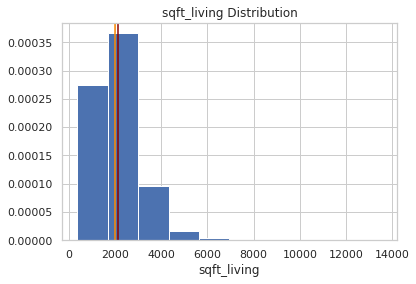

In [15]:
helper_describe_numerical_variable(data, 'sqft_living')

### Effect of sqft_living on price

Correlation coefficients between sqft_living and price:
r = 0.43041002543262796
rho = 0.6312642936337916


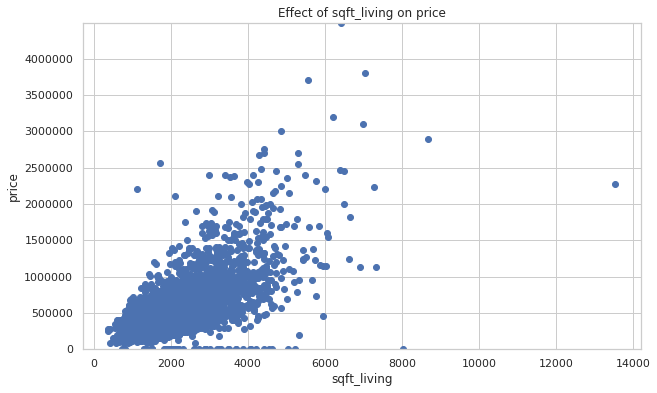

In [16]:
helper_effect_of_numerical_variable(data, 'sqft_living', 'price')

The general trends is that the house price increases with increasing sqft_living.

### EDA on location
The state-zip is used here as the indicator of location because the street address are too unique to the observation and country is too broad for this dataset. The reason that we don't use city as location is that different cities can share the same name.

In [17]:
pd.DataFrame(data.statezip.value_counts(normalize=True).sort_index()).head()

,statezip
WA 98001,0.014565
WA 98002,0.007826
WA 98003,0.010435
WA 98004,0.016087
WA 98005,0.006304


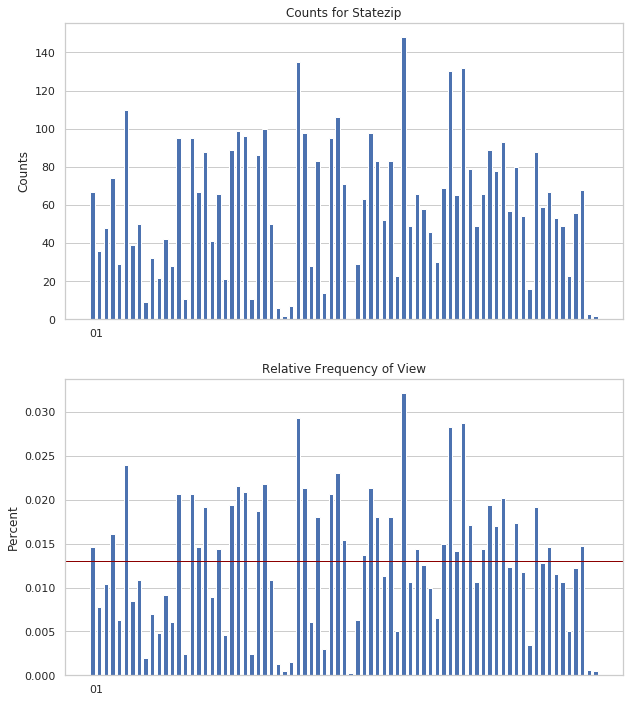

In [18]:
# Plot the histogram
counts = data.statezip.value_counts().sort_index()
proportions = data.statezip.value_counts(normalize=True).sort_index()
x = range(len(counts))
width = 1/1.5
figure = plt.figure(figsize=(10, 12))
axes = figure.add_subplot(2, 1, 1)
axes.bar(x, counts, width, align='center')
axes.set_xticks([0, 1])
axes.set_title('Counts for Statezip')
axes.set_ylabel('Counts')
axes.xaxis.grid(False)
axes = figure.add_subplot(2, 1, 2)
axes.bar(x, proportions, width, align="center")
axes.axhline(1/len(counts), 0, 4, lw=1, color="DarkRed")
axes.set_xticks([0, 1])
axes.set_title('Relative Frequency of View')
axes.set_ylabel('Percent')
axes.xaxis.grid(False)

### Effect of Location on Price

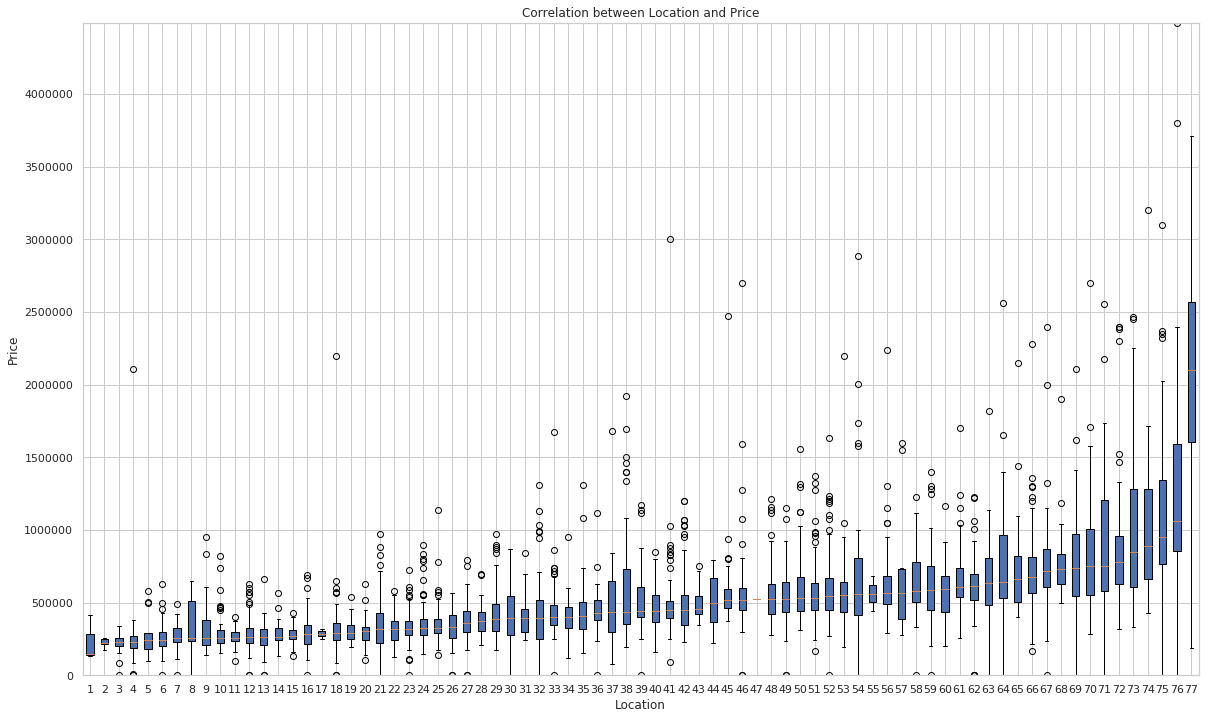

In [19]:
groups = data.groupby('statezip')
groups = sorted(groups, key=lambda x: np.median(x[1].price))
figure = plt.figure(figsize=(20, 12))
axes = figure.add_subplot(1, 1, 1)
axes.boxplot(
    [group.price for name, group in groups],
    patch_artist=True,
    zorder=1)
axes.set_xlabel('Location')
axes.set_ylabel('Price')
axes.set_title('Correlation between Location and Price')
axes.set_ylim(stats.mstats.mquantiles(data.price, [0.001, 0.999]))
plt.show()
plt.close()